<a href="https://colab.research.google.com/github/dantecomedia/Glass-Identification/blob/master/glass_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data=pd.read_csv("glass.csv")

In [382]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [384]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b189d00f0>,
      dtype=object)

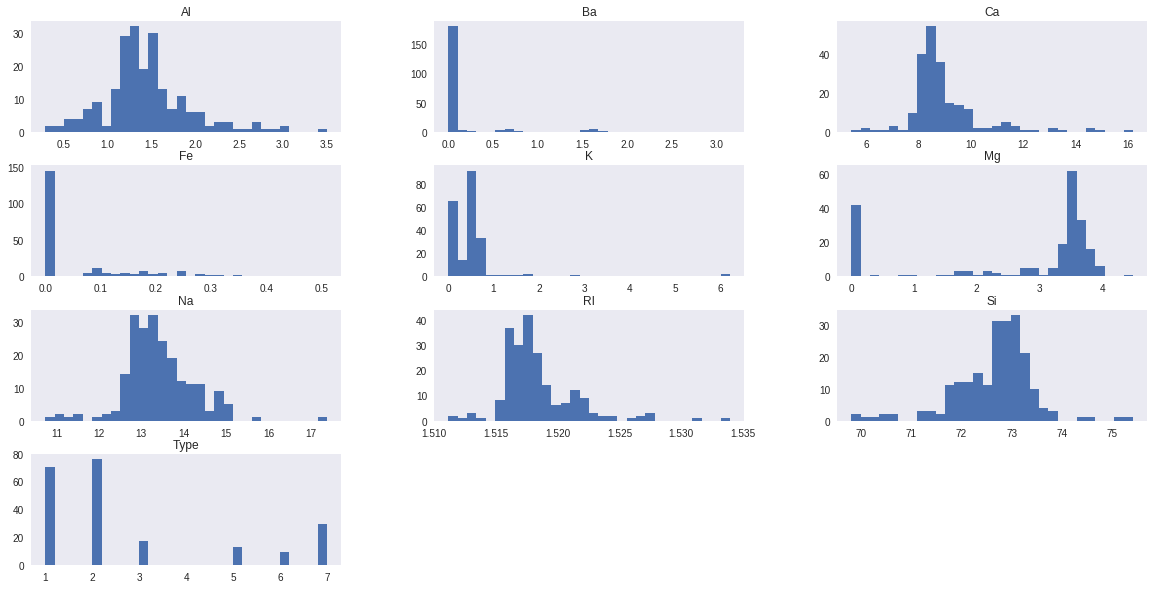

In [385]:
data.hist(figsize=(20,10),grid=False,bins=30)

In [0]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() 

In [0]:
X=sc.fit_transform(X)

In [0]:
from sklearn.decomposition import PCA

In [0]:
pc=PCA(n_components=8)
X=pc.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=None)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def knn():
  for i in range(1,11): 
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    acc=accuracy_score(y_test,y_pre)
    print("ACCURACY :",acc,"when neighbors:",i)
    plt.plot(sorted(y_pre),color="red")
    plt.plot(sorted(y_test))
    plt.show()



ACCURACY : 0.7592592592592593 when neighbors: 1


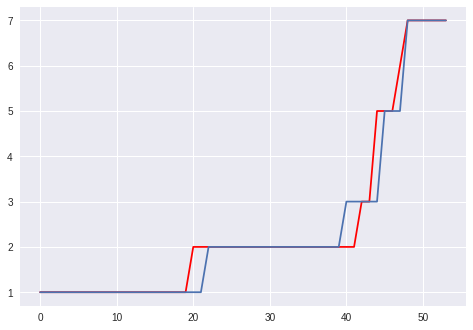

ACCURACY : 0.7407407407407407 when neighbors: 2


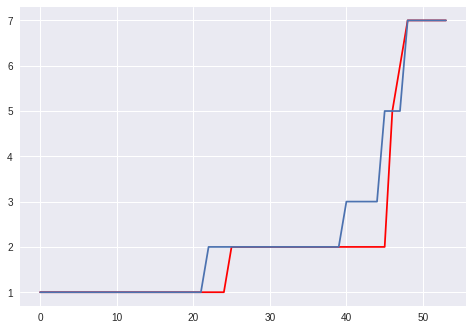

ACCURACY : 0.7962962962962963 when neighbors: 3


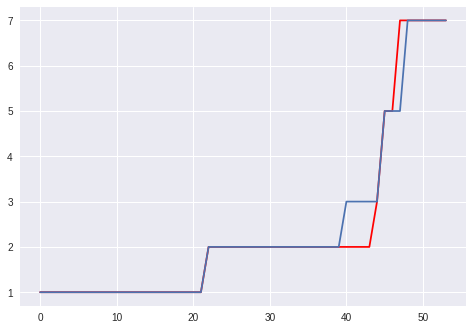

ACCURACY : 0.7222222222222222 when neighbors: 4


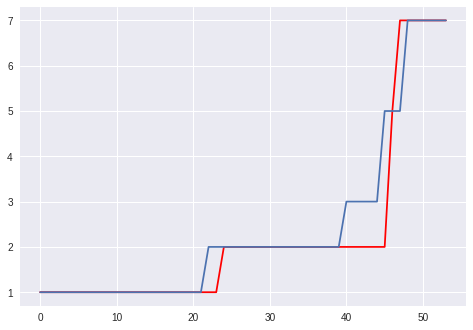

ACCURACY : 0.7222222222222222 when neighbors: 5


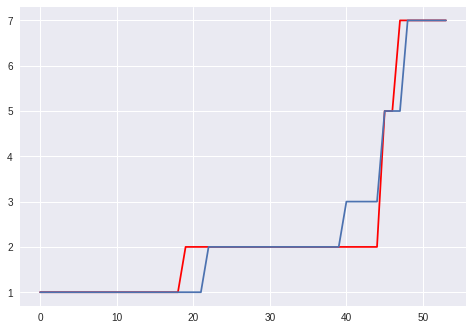

ACCURACY : 0.7407407407407407 when neighbors: 6


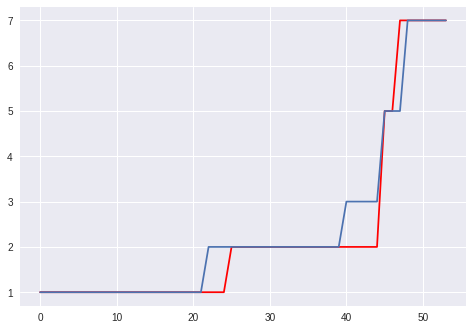

ACCURACY : 0.7407407407407407 when neighbors: 7


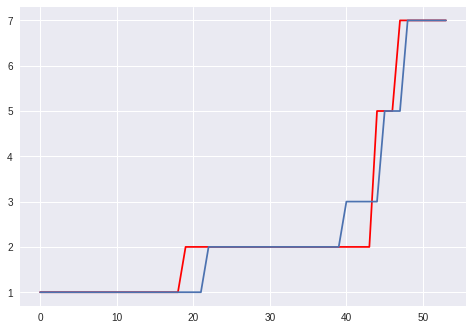

ACCURACY : 0.7407407407407407 when neighbors: 8


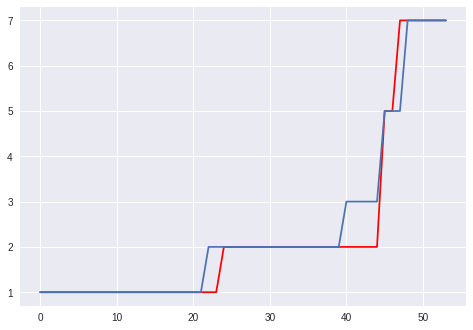

ACCURACY : 0.7407407407407407 when neighbors: 9


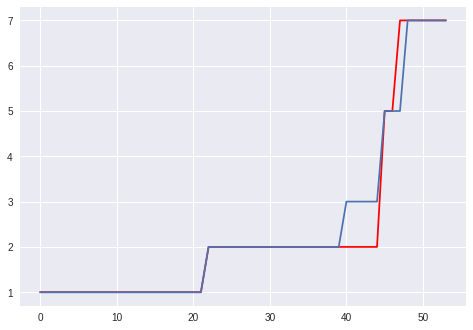

ACCURACY : 0.7407407407407407 when neighbors: 10


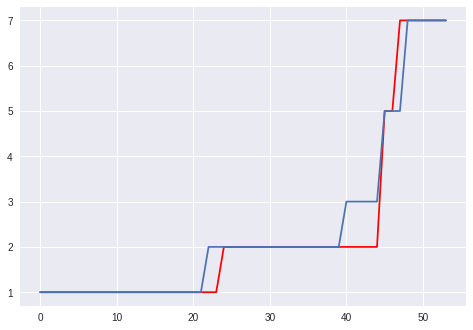

In [393]:
knn()